#### 1-INSTALANDO PACOTES

In [2]:
# Instalando pacotes necessários
%pip install pandas numpy openpyxl nbformat ipykernel plotly


# Importando as bibliotecas
import os
import pandas as pd
import nbformat as nb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from google.cloud import storage

# Comando para ignorar avisos em geral
import warnings
warnings.filterwarnings('ignore')

# Configuração da quantidade de colunas que vão aparecer em uma dataframe
pd.set_option('display.max_columns',100)


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


**SOBRE A BASE DE DADOS**

 DICIONÁRIO DE DADOS :

1-realSum: Preço total em euros para duas pessoas e duas noites

2-room_type: Tipo de quarto oferecido (alojamento)

3-room_shared: Se o quarto é compartilhado ou não

4-room_private: Se o quarto é privativo ou não

5-person_capacity: Número máximo de pessoas permitidas na propriedade

6-host_is_superhost: Se o host é ou não um superhost

7-multi: Tem vários quartos ou não

8-biz: Seja para uso comercial ou familiar

9-cleanliness_rating: Classificação de limpeza

10-guest_satisfaction_overall: Satisfação geral do hóspede

11-bedrooms: Número de quartos

12-dist: Distância do centro da cidade em km

13-lat: latitude

14-lng: longitude

15-attr_index: índice de atração do local do anúncio

16-attr_index_norm: índice de atração normalizado (0-100)

17-rest_index: restaurant index of the listing location

18-rest_index_norm: normalised restaurant index (0-100)

19-metro_dist: distância da estação de metrô mais próxima em km


FONTE : https://zenodo.org/record/4446043#.Y9Y9ENJBwUE

ETL - (Extração) - Dados Brutos 

In [3]:
# df = dataframe ou tabela
arquivo = (r"C:\Cursos e documentos\Bootcamp\Projeto - 01\data\raw\airbnbbruto.csv").replace('\\', '/' )
df = pd.read_csv(arquivo)

# visuaizando oo dataframe
display(df)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


### 2 - Transformação 

#### Backup - 01

In [4]:
# Cópia de segurança caso ocorra algum erro
df_backup01 = df.copy()

* TRADUÇÃO-(RENOMENANDO ATRIBUTOS)

In [5]:
# Traduzindo os atributos para um melhor entendimento dos dados 
df.rename(columns={'realSum':'preço_total', 'room_type':'tipo_quarto', 'room_shared':'quarto_compartilhado', 'room_private':'quarto_privado', 
    'person_capacity':'capacidade', 'host_is_superhost':'superhost', 'cleanliness_rating':'nota_limpeza', 'guest_satisfaction_overall':'satisfaçao', 
    'bedrooms':'n_quartos', 'dist':'distancia_centro', 'metro_dist':'distancia_metro', 'attr_index':'atraçao_local_anuncio','attr_index_norm':'atraçao',
    'rest_index':'restaurantes_localização', 'rest_index_norm':'atração_restaurantes', 'lng':'longitude', 'lat':'latitude'}, inplace = True)

# Exibindo o dataframe traduzido - comando head('argumento quantidade de registros')
df.head(10)  

,Unnamed: 0,preço_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes,longitude,latitude
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
5,5,552.808567,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966
6,6,215.124317,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296
7,7,2771.307384,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219,4.88467,52.38749
8,8,1001.804420,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686,4.86459,52.40175
9,9,276.521454,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478,4.87600,52.34700


In [6]:
# Visualizando os unicos tipos de registros do atributo tipo_quarto
df['tipo_quarto'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
# Criando um dicionário com a tradução dos tipos de quartos existentes dos registros do atributo tipo_quarto
tradução_tipo_quarto = {'Private room':'quarto privado', 'Entire home/apt':'Casa/apto inteiro','Shared room':'quarto compartilhado'} 

# Utilizando o dataframe(df) para localizar a coluna(atributo) tipo_quarto e fazendo a tradução utilizando o dicionário
df['tipo_quarto'].replace(tradução_tipo_quarto, inplace = True)

# Confirmando se está tudo certo utilizando a exibição
df['tipo_quarto'].unique()   

array(['quarto privado', 'Casa/apto inteiro', 'quarto compartilhado'],
      dtype=object)

In [8]:
# visualizando as últimas linhas do df - dataframe
df.tail()

,Unnamed: 0,preço_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes,longitude,latitude
1098,1098,2486.115342,Casa/apto inteiro,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,quarto privado,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,quarto privado,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Casa/apto inteiro,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794
1102,1102,258.008577,quarto compartilhado,True,False,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [9]:
# Visualizando o df de forma aleatória para achar possíveis inconsistências
# sample argumento número de registros que irão aparecer a executar aleatoriamente
df.sample(5)

,Unnamed: 0,preço_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes,longitude,latitude
1036,1036,658.730345,Casa/apto inteiro,False,False,4.0,False,0,0,8.0,88.0,2,3.525894,1.148051,154.830167,8.198360,199.005008,13.866955,4.85107,52.35473
339,339,501.253720,Casa/apto inteiro,False,False,2.0,False,0,0,10.0,100.0,1,2.314548,1.595429,193.879190,10.266032,241.681095,16.840686,4.85911,52.37315
949,949,233.637194,quarto privado,False,True,2.0,True,1,0,10.0,98.0,1,3.761426,0.339808,118.822751,6.291744,148.340886,10.336606,4.83810,52.37639
441,441,602.254353,Casa/apto inteiro,False,False,3.0,False,1,0,9.0,96.0,2,3.543961,0.439609,155.449925,8.231177,195.034699,13.590298,4.89895,52.34158
957,957,390.645139,Casa/apto inteiro,False,False,2.0,False,0,0,9.0,94.0,1,2.170218,1.901431,171.704553,9.091870,221.326881,15.422376,4.87720,52.39014


## Colunas que serão utilizadas na análise

* preço_total
* tipo_quarto
* capacidade
* superhost
* nota_limpeza
* satisfação
* n_quartos
* distancia_centro
* distancia_metro
* atraçao_local_anuncio
* atraçao
* restaurantes_localizaçao
* atraçao_restaurantes

In [10]:
# Verificando existência de dados nulos ou ausentes
df.isna().sum()

Unnamed: 0                  0
preço_total                 0
tipo_quarto                 0
quarto_compartilhado        0
quarto_privado              0
capacidade                  0
superhost                   0
multi                       0
biz                         0
nota_limpeza                0
satisfaçao                  0
n_quartos                   0
distancia_centro            0
distancia_metro             0
atraçao_local_anuncio       0
atraçao                     0
restaurantes_localização    0
atração_restaurantes        0
longitude                   0
latitude                    0
dtype: int64

In [11]:
df.head(2)

,Unnamed: 0,preço_total,tipo_quarto,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes,longitude,latitude
0,0,194.033698,quarto privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,quarto privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432


In [12]:
# Traz a tipagem de cada atributo 
df.dtypes

Unnamed: 0                    int64
preço_total                 float64
tipo_quarto                  object
quarto_compartilhado           bool
quarto_privado                 bool
capacidade                  float64
superhost                      bool
multi                         int64
biz                           int64
nota_limpeza                float64
satisfaçao                  float64
n_quartos                     int64
distancia_centro            float64
distancia_metro             float64
atraçao_local_anuncio       float64
atraçao                     float64
restaurantes_localização    float64
atração_restaurantes        float64
longitude                   float64
latitude                    float64
dtype: object

## Colunas que serão dropadas do dataframe 

* quarto_compartilhado
* quarto_privado
* multi
* biz
* longitude
* latitude

Esses atributos não são necessários para a análise, é importante dropar esses atributos para uma análise mais clara.

In [13]:
# Removendo as colunas(atributos) que não serão utilizados na análise
df.drop(['quarto_compartilhado','quarto_privado','multi','biz','longitude','latitude'],axis=1,inplace = True)

In [14]:
df

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
0,0,194.033698,quarto privado,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,1,344.245776,quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,2,264.101422,quarto privado,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,4,485.552926,quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Casa/apto inteiro,2.0,False,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521
1099,1099,233.637194,quarto privado,2.0,False,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335
1100,1100,317.062311,quarto privado,2.0,False,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927
1101,1101,1812.855904,Casa/apto inteiro,4.0,False,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022


In [15]:
# Criando um novo backup pra o dataframe apartir das coluna(atributos) que serão utilizados
dfbackup02 = df.copy()

In [16]:
df.head(10)

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
0,0,194.033698,quarto privado,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,1,344.245776,quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,2,264.101422,quarto privado,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,4,485.552926,quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,5,552.808567,quarto privado,3.0,False,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,6,215.124317,quarto privado,2.0,False,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,7,2771.307384,Casa/apto inteiro,4.0,True,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,8,1001.804420,Casa/apto inteiro,4.0,False,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,9,276.521454,quarto privado,2.0,False,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


In [17]:
# Observando se todos os atributos tem a mesma quantidade de resgistros (preparando o data frame para análise)
df.count()

Unnamed: 0                  1103
preço_total                 1103
tipo_quarto                 1103
capacidade                  1103
superhost                   1103
nota_limpeza                1103
satisfaçao                  1103
n_quartos                   1103
distancia_centro            1103
distancia_metro             1103
atraçao_local_anuncio       1103
atraçao                     1103
restaurantes_localização    1103
atração_restaurantes        1103
dtype: int64

In [18]:
# Verificação de valores unicos nas colunas que farão parte da análise
# Essa linha de código foi utilizada para observar coluna por coluna . Não foi encontrados dados unicos em uma coluna o que faria com que a coluna não fosse interessante para a análise
df['n_quartos'].unique()

array([1, 2, 3, 0, 5, 4], dtype=int64)

In [19]:
# Visualização de valores unicos para ver inconsistências. Utilizando  a função sorted() para ordenar os valores
# Visualização coluna por coluna pra encontrar inconsistências. Não foram encontradas inconsistências
sorted(pd.unique(df['atração_restaurantes']))

[3.545204720017045,
 3.5742558686210484,
 3.580741523076774,
 3.6093932835334464,
 3.6402776199564073,
 3.640415876858557,
 3.695634411752903,
 3.729029831417621,
 3.80895102312167,
 3.821171665476073,
 3.841975187138168,
 3.886737136423467,
 3.8937406343828167,
 3.917154151083281,
 3.9480179213533257,
 3.9504188072549207,
 4.118930977288363,
 4.140380419612353,
 4.235715128070345,
 4.272530560560858,
 4.291643350976307,
 4.305925939759352,
 4.339631905797865,
 4.3863641662056345,
 4.463214756031835,
 4.570184473559831,
 4.573501193218304,
 4.603619759849087,
 4.608795395138263,
 4.611438863654829,
 4.611441437686482,
 4.663274589647713,
 4.713187676566162,
 4.721144898384859,
 4.795326145401816,
 4.836811750976599,
 4.878336402939124,
 4.935321329836559,
 4.965894656494007,
 5.006311052003869,
 5.023844083408473,
 5.029975994352804,
 5.057885686658303,
 5.125490405341109,
 5.156631669283051,
 5.172190009831185,
 5.21023813767145,
 5.245818009827794,
 5.252449545665914,
 5.274958531811

In [20]:
df.dtypes

Unnamed: 0                    int64
preço_total                 float64
tipo_quarto                  object
capacidade                  float64
superhost                      bool
nota_limpeza                float64
satisfaçao                  float64
n_quartos                     int64
distancia_centro            float64
distancia_metro             float64
atraçao_local_anuncio       float64
atraçao                     float64
restaurantes_localização    float64
atração_restaurantes        float64
dtype: object

In [21]:
# Guardando o dataframe tratado 
df_final = df.copy()
df_final.head()

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
0,0,194.033698,quarto privado,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,1,344.245776,quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,2,264.101422,quarto privado,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,4,485.552926,quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [22]:
# Carregando o dataframe tratado para o diretório processed
pasta = 'C:\\Cursos e documentos\\Bootcamp\\Projeto - 01\\data\\processed'
arquivo_csv = os.path.join(pasta, 'arquivo_final.csv')

if not os.path.exists(pasta):
    try:
        os.makedirs(pasta, exist_ok=True)
    except OSError as e:
        print(f"Erro ao criar o diretório: {e}")
        raise

try:
    df_final.to_csv(arquivo_csv, index=False)
    print(f'Arquivo CSV salvo em {arquivo_csv}')
except PermissionError as e:
    print(f"Permissão negada ao tentar salvar o arquivo CSV: {e}")

Arquivo CSV salvo em C:\Cursos e documentos\Bootcamp\Projeto - 01\data\processed\arquivo_final.csv


### Análises

In [23]:
'''
Fazendo algumas relações com o tipo de quarto e o seu preço , podemos observar que há uma diferença de valor muito grande entre
o quarto de índice "0" e índice "4" que são igualmente quartos privados revelando então que existe outro fator para diferença de valor.
'''

df_final.loc[[0,4,100], ['preço_total', 'tipo_quarto']]

,preço_total,tipo_quarto
0,194.033698,quarto privado
4,485.552926,quarto privado
100,539.216835,Casa/apto inteiro


In [24]:
'''
Podemos observa no mesmo tipo de análise para os mesmos índices selecionados que um fator importante para a diferença de valor
pode ser a distância para o centro da cidade , no índice "0" a distância pra o centro é de 5 km já no índice "4" é de 0.5 km
e seu valor é maior mesmo sendo também um quarto privado.
'''
df_final.loc[[0,4,100], ['preço_total', 'tipo_quarto','nota_limpeza','distancia_centro']]

,preço_total,tipo_quarto,nota_limpeza,distancia_centro
0,194.033698,quarto privado,10.0,5.022964
4,485.552926,quarto privado,10.0,0.544738
100,539.216835,Casa/apto inteiro,10.0,3.781331


In [25]:
'''
Como podemos observar outros pontos importantes para a análise são a distância para o metro e os índices de de atrações,
localização do local e restaurantes.
'''
df_final.loc[[0,4,100], ['preço_total','distancia_centro','distancia_metro','atraçao','atração_restaurantes','restaurantes_localização','atraçao_local_anuncio']]

,preço_total,distancia_centro,distancia_metro,atraçao,atração_restaurantes,restaurantes_localização,atraçao_local_anuncio
0,194.033698,5.022964,2.539380,4.166708,6.846473,98.253896,78.690379
4,485.552926,0.544738,0.318693,29.272733,56.811677,815.305740,552.830324
100,539.216835,3.781331,0.920214,7.315317,12.099339,173.637908,138.153442


In [26]:
'''
Para concretizar a análise dos fatores determinantes para a diferença de preço entre
tipos de quartos iguais resolvi analisar os 10 primeiros registros.
'''
df_final.loc[[0,1,2,3,4,5,6,7,8,9,10], ['preço_total','tipo_quarto','distancia_centro','distancia_metro']]

,preço_total,tipo_quarto,distancia_centro,distancia_metro
0,194.033698,quarto privado,5.022964,2.539380
1,344.245776,quarto privado,0.488389,0.239404
2,264.101422,quarto privado,5.748312,3.651621
3,433.529398,quarto privado,0.384862,0.439876
4,485.552926,quarto privado,0.544738,0.318693
5,552.808567,quarto privado,2.131420,1.904668
6,215.124317,quarto privado,1.881092,0.729747
7,2771.307384,Casa/apto inteiro,1.686807,1.458404
8,1001.804420,Casa/apto inteiro,3.719141,1.196112
9,276.521454,quarto privado,3.142361,0.924404


In [27]:
'''
Aprofundando a análise para achar o fator determinante para o preço, um candidato forte
 para esse fator é atração do local no anúncio além dos outros já informados.
'''

df_final.loc[[0,1,2,3,4,5,6,7,8,9,10], ['preço_total','tipo_quarto','capacidade','distancia_centro','distancia_metro','atraçao_local_anuncio','atração_restaurantes']]

,preço_total,tipo_quarto,capacidade,distancia_centro,distancia_metro,atraçao_local_anuncio,atração_restaurantes
0,194.033698,quarto privado,2.0,5.022964,2.539380,78.690379,6.846473
1,344.245776,quarto privado,4.0,0.488389,0.239404,631.176378,58.342928
2,264.101422,quarto privado,2.0,5.748312,3.651621,75.275877,6.646700
3,433.529398,quarto privado,4.0,0.384862,0.439876,493.272534,60.973565
4,485.552926,quarto privado,2.0,0.544738,0.318693,552.830324,56.811677
5,552.808567,quarto privado,3.0,2.131420,1.904668,174.788957,15.692376
6,215.124317,quarto privado,2.0,1.881092,0.729747,200.167652,16.916251
7,2771.307384,Casa/apto inteiro,4.0,1.686807,1.458404,208.808109,18.975219
8,1001.804420,Casa/apto inteiro,4.0,3.719141,1.196112,106.226456,9.328686
9,276.521454,quarto privado,2.0,3.142361,0.924404,206.252862,16.604478


In [28]:
# Resumo estatístico
df_final.describe()

,Unnamed: 0,preço_total,capacidade,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081
std,318.552978,416.974314,1.044151,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400
min,0.000000,128.887118,2.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205
25%,275.500000,309.797764,2.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772
50%,551.000000,430.248635,2.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084
75%,826.500000,657.324303,4.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846
max,1102.000000,7782.907225,6.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000


### Filtros

In [29]:
df.dtypes

Unnamed: 0                    int64
preço_total                 float64
tipo_quarto                  object
capacidade                  float64
superhost                      bool
nota_limpeza                float64
satisfaçao                  float64
n_quartos                     int64
distancia_centro            float64
distancia_metro             float64
atraçao_local_anuncio       float64
atraçao                     float64
restaurantes_localização    float64
atração_restaurantes        float64
dtype: object

In [30]:
# Filtro criado para encontrar os registros com atração do local no anúncio maior que 150

ft_atraçao_local_anuncio = (df_final['atraçao_local_anuncio'] >= 150)
df_final.loc[ft_atraçao_local_anuncio].head(10)

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
1,1,344.245776,quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,4,485.552926,quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,5,552.808567,quarto privado,3.0,False,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,6,215.124317,quarto privado,2.0,False,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,7,2771.307384,Casa/apto inteiro,4.0,True,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
9,9,276.521454,quarto privado,2.0,False,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
10,10,909.474375,Casa/apto inteiro,2.0,False,10.0,96.0,1,1.009922,0.917115,409.858124,21.702260,555.114276,38.681161
11,11,319.640053,quarto privado,2.0,True,10.0,97.0,1,2.182707,1.590381,191.501339,10.140123,229.297401,15.977773
12,12,675.602840,Casa/apto inteiro,4.0,False,8.0,87.0,1,2.933046,0.628073,214.923342,11.380334,269.624904,18.787851


In [31]:
# Filtro para menos de 50% de satisfação

'''
Apenas dois registros foram encontrados com nota de satisfação abaixo de 50 e
ambos aparecem com a nota de limpeza abaixo de sete o que pode ser um forte
indicativo de que a satisfação está atrelada a limpeza do ambiente.
'''

ft_baixa_satisfacao = (df_final['satisfaçao'] <= 50)
df_final.loc[ft_baixa_satisfacao]

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
627,627,528.437185,quarto privado,2.0,False,4.0,47.0,1,3.809663,0.417682,122.940435,6.509778,152.970546,10.659208
901,901,233.637194,quarto privado,2.0,False,6.0,20.0,1,8.145037,0.688409,57.893170,3.065482,74.226223,5.172190


In [32]:
# Sobre tentar entender a diferença de valor entre os mesmos tipos de quartos optei por observar apenas os quartos 'quarto privado' para observar qual atributo tem maior relevância na diferença # de valor, alguns atributos podem ser usados para essa análise mais profunda: capacidade, satisfação, n_quartos, distancia_centro, distancia_metro.
df_final[df_final['tipo_quarto'] == 'quarto privado'].head(20)

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
0,0,194.033698,quarto privado,2.0,False,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,1,344.245776,quarto privado,4.0,False,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,2,264.101422,quarto privado,2.0,False,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,4,485.552926,quarto privado,2.0,True,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,5,552.808567,quarto privado,3.0,False,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,6,215.124317,quarto privado,2.0,False,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,9,276.521454,quarto privado,2.0,False,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
11,11,319.640053,quarto privado,2.0,True,10.0,97.0,1,2.182707,1.590381,191.501339,10.140123,229.297401,15.977773
14,14,209.031472,quarto privado,2.0,False,8.0,96.0,1,7.304535,3.720814,59.776181,3.165188,75.701057,5.274959


In [33]:
# usando o sample para visualizar diferentes registros para comparar os valores 
df_final[df_final['tipo_quarto'] == 'quarto privado'].sample(20)

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
444,444,313.312868,quarto privado,4.0,False,10.0,94.0,1,0.743948,0.624810,485.860143,25.726617,676.919472,47.168723
1023,1023,196.611440,quarto privado,2.0,False,8.0,84.0,1,10.967236,1.819240,41.275847,2.185584,51.294232,3.574256
227,227,522.344340,quarto privado,4.0,False,10.0,96.0,2,2.696581,1.831516,217.864293,11.536059,268.904154,18.737628
723,723,320.811755,quarto privado,2.0,False,9.0,88.0,1,3.316962,1.499260,177.705790,9.409640,228.356979,15.912243
229,229,204.110327,quarto privado,2.0,False,10.0,94.0,1,10.898647,0.200333,42.010232,2.224470,52.243696,3.640416
499,499,337.918590,quarto privado,2.0,True,10.0,96.0,1,1.231426,0.513714,518.394519,27.449334,1435.102401,100.000000
408,408,362.524313,quarto privado,4.0,True,9.0,96.0,1,4.593931,0.105187,118.695415,6.285001,147.341879,10.266994
269,269,449.698873,quarto privado,4.0,True,10.0,98.0,1,0.240367,0.477043,573.923364,30.389623,881.636441,61.433696
606,606,786.445762,quarto privado,4.0,False,9.0,95.0,1,0.955193,0.587607,472.359234,25.011735,777.865484,54.202786
726,726,564.056898,quarto privado,2.0,False,10.0,100.0,2,3.400626,0.876152,181.303997,9.600167,210.116132,14.641194


In [34]:
# Apenas dois registros que tiveram a nota de limpeza menor que sete tiveram a satisfação menor que cinquenta, o que não torna a nota de limpeza um forte indicativo, vamos partir para os gráficos para encontrar o que de fato torna essa diferença de preço em quartos do mesmo tipo.
df_final[df_final['nota_limpeza'] < 7].head(20)

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
64,64,347.995219,Casa/apto inteiro,3.0,False,6.0,77.0,2,4.416817,0.446809,117.231069,6.207463,148.952353,10.379214
71,71,374.944344,quarto privado,4.0,False,6.0,88.0,1,0.944521,0.727107,320.239939,16.956918,458.132692,31.923345
239,239,303.470579,quarto privado,4.0,False,5.0,80.0,0,3.875694,0.533551,110.863573,5.870300,140.465833,9.787861
544,544,276.287114,quarto privado,2.0,False,6.0,70.0,1,2.432694,0.728726,343.814017,18.205181,335.454751,23.374970
626,626,651.231458,Casa/apto inteiro,4.0,False,6.0,65.0,2,1.768897,1.585159,202.001797,10.696129,262.838989,18.314999
627,627,528.437185,quarto privado,2.0,False,4.0,47.0,1,3.809663,0.417682,122.940435,6.509778,152.970546,10.659208
653,653,375.881705,Casa/apto inteiro,2.0,False,6.0,80.0,1,1.763043,1.895295,215.614725,11.416943,278.917855,19.435397
743,743,640.451808,Casa/apto inteiro,2.0,False,6.0,80.0,1,1.908980,0.293735,495.386305,26.231034,578.072106,40.280896
823,823,303.001898,quarto privado,2.0,False,4.0,80.0,1,2.123892,0.415379,313.756885,16.613636,378.684233,26.387262
853,853,566.634640,Casa/apto inteiro,4.0,False,6.0,60.0,2,1.871276,1.933709,207.072639,10.964634,263.188425,18.339348


In [35]:
# Este filtro trás os dados onde a capacidade é igual a 4, o tipo de quarto é privado e o número de quartos é igual a 2.
df_final[(df_final['capacidade'] == 4) & (df_final['tipo_quarto'] == 'quarto privado') & (df_final['n_quartos'] == 2) & (df_final['distancia_centro']<=1)]

,Unnamed: 0,preço_total,tipo_quarto,capacidade,superhost,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
3,3,433.529398,quarto privado,4.0,False,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
300,300,614.440044,quarto privado,4.0,False,9.0,95.0,2,0.868938,0.943107,633.999705,33.570706,545.785738,38.031135
351,351,661.308087,quarto privado,4.0,False,9.0,95.0,2,0.297473,0.273675,639.031577,33.837147,832.943384,58.040693
551,551,632.952921,quarto privado,4.0,False,9.0,80.0,2,0.440433,0.456848,595.907882,31.553718,684.348407,47.686382
755,755,613.737023,quarto privado,4.0,True,10.0,100.0,2,0.776168,0.852993,843.992025,44.689938,583.721057,40.674523
843,843,940.172943,quarto privado,4.0,False,10.0,80.0,2,0.914563,0.408741,376.130306,19.916350,463.323403,32.285041
849,849,325.498559,quarto privado,4.0,False,9.0,87.0,2,0.406359,0.461966,478.514278,25.337649,805.939797,56.159045
852,852,636.702364,quarto privado,4.0,False,9.0,90.0,2,0.435388,0.304292,574.800306,30.436058,826.222187,57.572351
1049,1049,894.710941,quarto privado,4.0,True,10.0,94.0,2,0.398397,0.303282,548.926162,29.066005,712.855728,49.672813


In [36]:
medidas = df_final.describe()
display(round(medidas))

,Unnamed: 0,preço_total,capacidade,nota_limpeza,satisfaçao,n_quartos,distancia_centro,distancia_metro,atraçao_local_anuncio,atraçao,restaurantes_localização,atração_restaurantes
count,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0,1103.0
mean,551.0,545.0,3.0,9.0,94.0,1.0,3.0,1.0,271.0,14.0,342.0,24.0
std,319.0,417.0,1.0,1.0,6.0,1.0,2.0,1.0,197.0,10.0,237.0,16.0
min,0.0,129.0,2.0,4.0,20.0,0.0,0.0,0.0,41.0,2.0,51.0,4.0
25%,276.0,310.0,2.0,9.0,92.0,1.0,1.0,0.0,128.0,7.0,163.0,11.0
50%,551.0,430.0,2.0,10.0,96.0,1.0,2.0,1.0,208.0,11.0,260.0,18.0
75%,826.0,657.0,4.0,10.0,98.0,2.0,4.0,2.0,386.0,20.0,469.0,33.0
max,1102.0,7783.0,6.0,10.0,100.0,5.0,11.0,4.0,1889.0,100.0,1435.0,100.0


In [37]:
round(medidas.loc[['mean']][['distancia_metro', 'distancia_centro', 'satisfaçao']],2)

,distancia_metro,distancia_centro,satisfaçao
mean,1.09,2.84,94.36


### Visualização

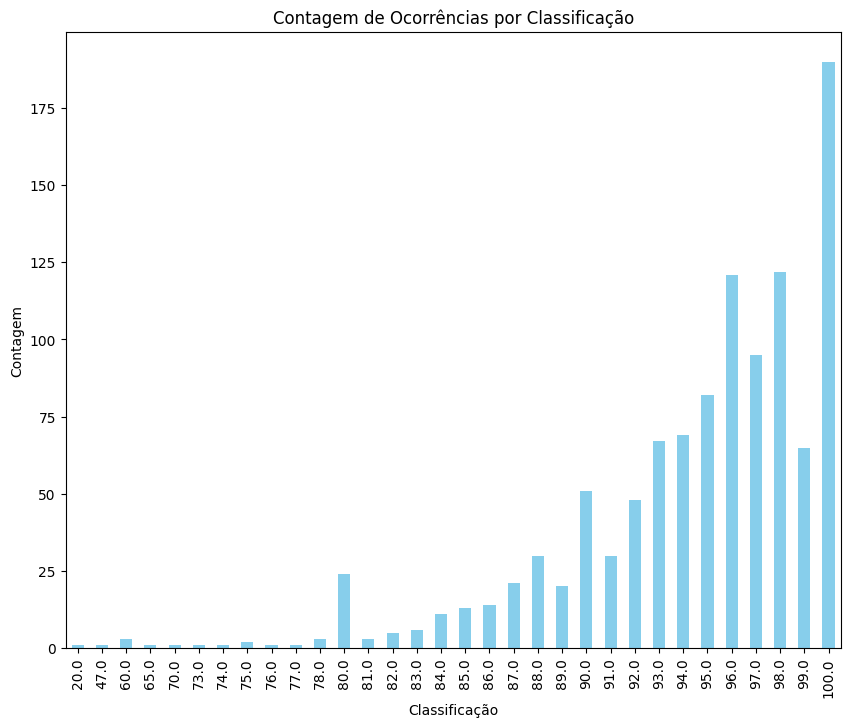

In [38]:
# Gráfico de barras horizontal
df.groupby(['satisfaçao']).size().plot.bar(figsize=(10,8), color=['skyblue'])
plt.xlabel('Classificação')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Classificação')
plt.show()

## **ANÁLISE SWOT**

* **FORÇA**:
 Ampla seleção: a AIRBN oferece diferentes tipos de quartos o que atende a grande maioria do público alvo.

* **FRAQUEZA**:
Não vejo nada além  da concorrência , que pode criar estratégias para superar a AIRBN no seguimento.

* **OPORTUNIDADES**:
Expanção e alcance , a AIRBN tem uma grande possibilidade de expandir para novos mercados e propocionar experiências distintas que os concorrentes não oferecem .

* **AMEAÇAS**:
Com o aumento da popularidade da AIRBN um busca por semelhantes também cresce e aumenta as chances da concorrência.

* **CONCLUSÃO**:
Seguindo a análise, oferecer quartos com a maior proximidade de locais atrativos e de grande acessiblidade se faz necessário para uma melhor experiência do cliente .
A AIRBN tem feito bem o seu papel, seus clientes na grande maioria tem sido satisfeitos e isso torna a AIRBN forte no mercado.